In [1]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
import cv2
import numpy as np
import random
from shutil import copyfile

In [12]:
ROOT1 = 'C:/Users/Maciej/OneDrive/Dokumenty/PUT/mgr/1sem/MP/res/dataset/test1/test1/'
ROOT2 = 'C:/Users/Maciej/OneDrive/Dokumenty/PUT/mgr/1sem/MP/res/dataset/train/train/'
ROOT3 = 'C:/Users/Maciej/OneDrive/Dokumenty/PUT/mgr/1sem/MP/res/dataset/train2/train2/'

In [13]:
def adjust_brightness_in_rectangle(image, rectangle_coords, alpha=1.0, beta=0.0, gamma=1.0):
    mask = np.zeros_like(image, dtype=np.uint8)
    x, y, w, h = rectangle_coords
    mask[y:y+h, x:x+w] = 255
    
    adjusted_image = np.copy(image)
    adjusted_image[mask == 0] = np.clip(alpha * adjusted_image[mask == 0] + beta, 0, 255)
    
    rectangle_pixels = adjusted_image[mask == 255]
    mean_pixel_value = np.mean(rectangle_pixels)
    adjusted_image[mask == 255] = np.clip(gamma * (rectangle_pixels - mean_pixel_value) + mean_pixel_value, 0, 255)
    
    return adjusted_image

In [14]:
def show_subject(subject_id='00001', num_images=3, root_dir1=ROOT3, root_dir2=ROOT2, alpha=1.0, beta=0.0, gamma=1.0):

    img_cover_type = os.listdir(f'{root_dir1}{subject_id}/IR')[0]
    img_uncover_type = os.listdir(f'{root_dir2}{subject_id}/IR')[0]

    for i in range(num_images):
        fig, ax = plt.subplots(1, 3, figsize=(7, 5))
        gt_file = f'{root_dir2}{subject_id}/joints_gt_IR.mat'
        mat = loadmat(gt_file)
        gt_mat = mat['joints_gt']
        gt = gt_mat[:, :, i]
        thorax_x, thorax_y = gt[0, 12], gt[1, 12]
        thorax_y += random.uniform(-3, 3)
        ir_file = f"{root_dir1}{subject_id}/IR/{img_cover_type}/image_{i + 1:06}.png"
        ir_file2 = f"{root_dir2}{subject_id}/IR/{img_uncover_type}/image_{i + 1:06}.png"
        ir_img = plt.imread(ir_file)
        ir_img2 = plt.imread(ir_file2)
        
        rectangle_coords = (20, int(thorax_y), 80, 120)
        ir_img3 = adjust_brightness_in_rectangle(ir_img2, rectangle_coords, alpha = alpha, beta = beta, gamma = gamma)
        
        
        ax[0].imshow(ir_img, cmap='hot')
        ax[1].imshow(ir_img3, cmap='hot')
        ax[2].imshow(ir_img2, cmap='hot')
        plt.tight_layout()
        plt.show()

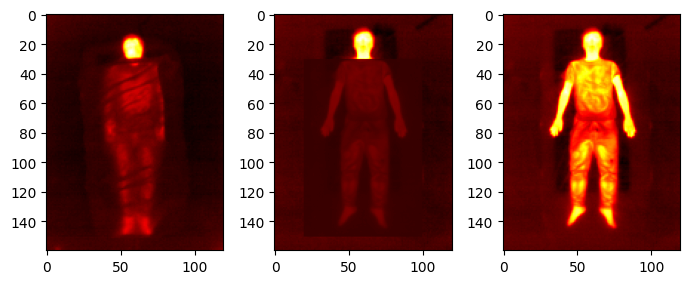

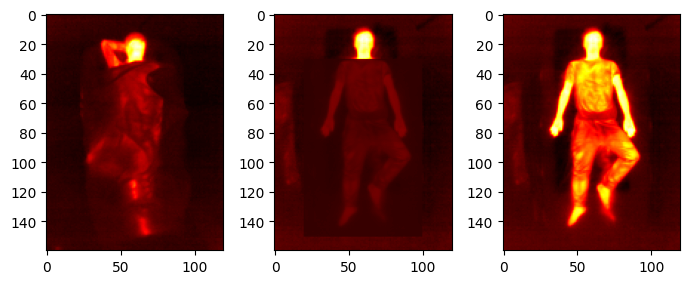

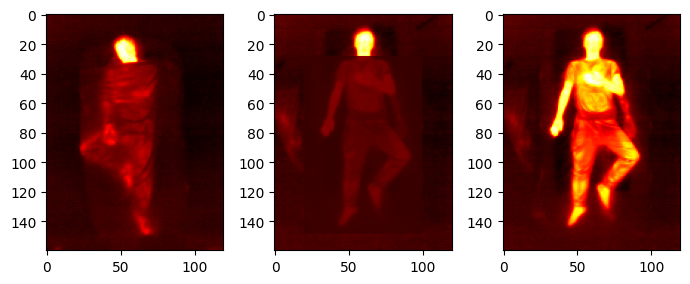

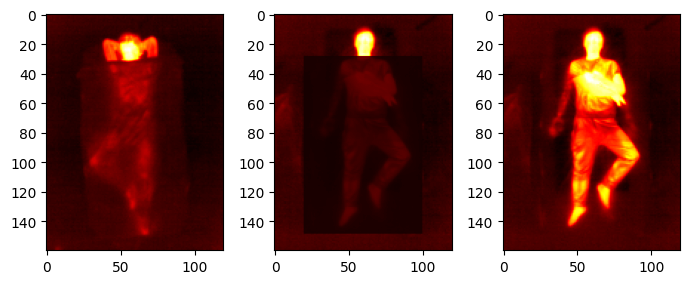

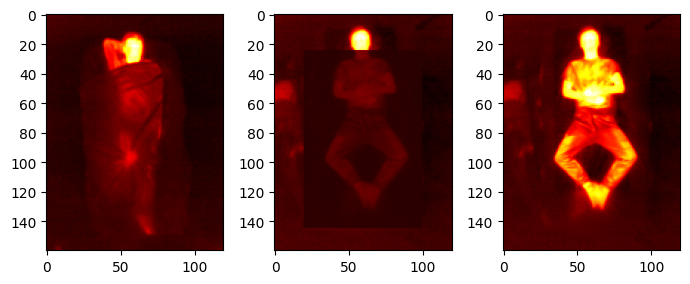

In [15]:
show_subject(subject_id='00003', num_images=5, root_dir1 = ROOT1, root_dir2 = ROOT2, alpha=1.5, beta=0.05, gamma=0.2)

In [16]:
def modify_and_save_photos(train_dir=ROOT2, train2_dir=ROOT3, alpha=1.5, beta=0.05, gamma=0.2):
    if not os.path.exists(train2_dir):
        os.makedirs(train2_dir)

    subjects = sorted(os.listdir(train_dir))[:30]
    for subject_id in subjects:
        subject_path = os.path.join(train_dir, subject_id)
        subject2_path = os.path.join(train2_dir, subject_id)
        
        if not os.path.exists(subject2_path):
            os.makedirs(subject2_path)
        
        ir_dir = os.path.join(subject_path, 'IR', 'uncover')
        ir2_dir = os.path.join(subject2_path, 'IR', 'uncover')
        
        if not os.path.exists(ir2_dir):
            os.makedirs(ir2_dir)
        
        gt_file = os.path.join(subject_path, 'joints_gt_IR.mat')
        if os.path.exists(gt_file):
            gt_file2 = os.path.join(subject2_path, 'joints_gt_IR.mat')
            copyfile(gt_file, gt_file2)

            mat = loadmat(gt_file)
            gt_mat = mat['joints_gt']
        
            ir_files = os.listdir(ir_dir)
            for i, ir_filename in enumerate(ir_files):
                ir_file = os.path.join(ir_dir, ir_filename)
                ir_img = cv2.imread(ir_file, cv2.IMREAD_GRAYSCALE)
                
                gt = gt_mat[:, :, i]
                thorax_x, thorax_y = gt[0, 12], gt[1, 12]
                thorax_y += random.uniform(-3, 3)
                
                rectangle_coords = (20, int(thorax_y), 80, 120)
                ir_img_modified = adjust_brightness_in_rectangle(ir_img, rectangle_coords, alpha=alpha, beta=beta, gamma=gamma)
                
                ir2_file = os.path.join(ir2_dir, ir_filename)
                cv2.imwrite(ir2_file, ir_img_modified)

In [ ]:
modify_and_save_photos(train_dir=ROOT2, train2_dir=ROOT3, alpha=1.5, beta=0.05, gamma=0.2)